In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [22]:
BTC = pd.read_excel('/Users/pankit/Downloads/Bitcoin_historic_data_.xlsx')

In [24]:
BTC.head()

,Date,open,high,low,close,volume,marketCap
0,2025-03-04,86064.066659,88911.274078,81529.239833,87222.192207,6.809524e+10,1.729670e+12
1,2025-03-03,94248.421497,94429.747824,85081.304929,86065.668329,7.007223e+10,1.707125e+12
2,2025-03-02,86036.257550,95043.435203,85040.211165,94248.350525,5.839834e+10,1.869318e+12
3,2025-03-01,84373.864372,86522.302345,83794.232492,86031.912398,2.919063e+10,1.706161e+12
4,2025-02-28,84705.628480,85036.322227,78248.916102,84373.010330,8.361057e+10,1.673219e+12


In [25]:
#Summary

BTC.describe()


,open,high,low,close,volume,marketCap
count,364.000000,364.000000,364.000000,364.000000,3.640000e+02,3.640000e+02
mean,74572.525411,76070.182383,73013.110753,74636.519361,4.102786e+10,1.474500e+12
std,15697.704392,15988.572375,15372.982270,15700.394873,2.325498e+10,3.132576e+11
min,53949.087154,54838.145672,49121.237378,53948.752243,9.858199e+09,1.065529e+12
25%,62931.264198,64124.147401,61669.652629,62930.704438,2.615349e+10,1.242242e+12
50%,67732.083153,68822.339111,66434.465893,67781.555859,3.502535e+10,1.335180e+12
75%,93685.444679,95218.589166,91433.679634,93688.886415,4.909472e+10,1.855225e+12
max,106147.295260,109114.884834,105291.737868,106146.263007,1.492189e+11,2.102916e+12


In [26]:
#Creatig a Percentage Change series

BTC['PerChange'] = BTC['close'].pct_change()

In [27]:
BTC.head()

,Date,open,high,low,close,volume,marketCap,PerChange
0,2025-03-04,86064.066659,88911.274078,81529.239833,87222.192207,6.809524e+10,1.729670e+12,NaN
1,2025-03-03,94248.421497,94429.747824,85081.304929,86065.668329,7.007223e+10,1.707125e+12,-0.013260
2,2025-03-02,86036.257550,95043.435203,85040.211165,94248.350525,5.839834e+10,1.869318e+12,0.095075
3,2025-03-01,84373.864372,86522.302345,83794.232492,86031.912398,2.919063e+10,1.706161e+12,-0.087179
4,2025-02-28,84705.628480,85036.322227,78248.916102,84373.010330,8.361057e+10,1.673219e+12,-0.019282


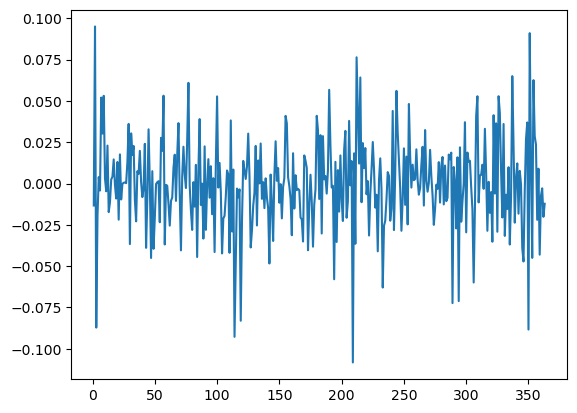

In [28]:
#Plotting the Percentage Change

Pt2 = BTC['PerChange'].plot(style = ['-'])

#Simple graph. We have plotted with date and percentage change on the next

<function matplotlib.pyplot.show(close=None, block=None)>

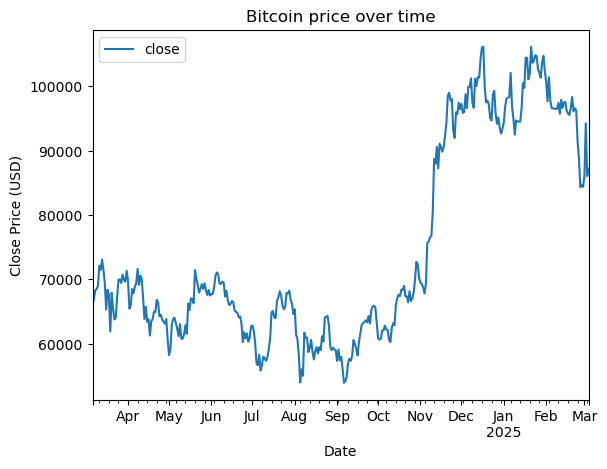

In [29]:
Pt1 = BTC.plot(x='Date', y='close')
Pt1.set_title("Bitcoin price over time")
Pt1.set_xlabel("Date")
Pt1.set_ylabel("Close Price (USD)")
plt.show

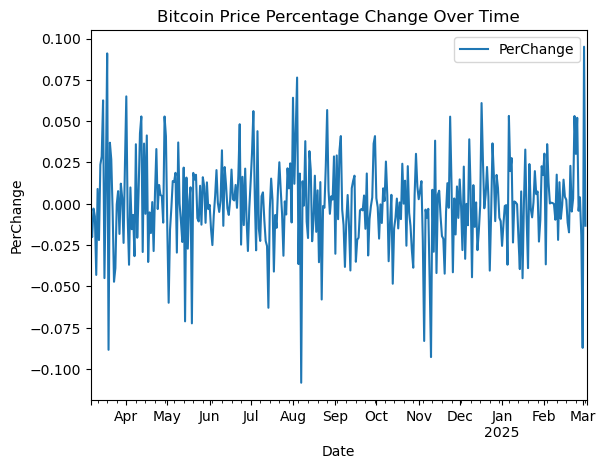

In [31]:
Pt2 = BTC.plot(x='Date', y='PerChange')
Pt2.set_title("Bitcoin Price Percentage Change Over Time")
Pt2.set_xlabel("Date")
Pt2.set_ylabel("PerChange")
plt.show()

In [32]:
#On the above percentage change graph, we can see the high volatlity 

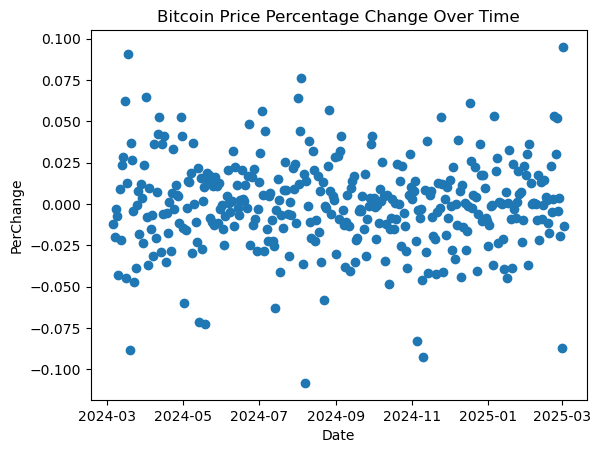

In [36]:
#Scatter plot

Pt3 = plt.scatter(BTC['Date'], BTC['PerChange'])
plt.title("Bitcoin Price Percentage Change Over Time")
plt.xlabel("Date")
plt.ylabel("PerChange")
plt.show()


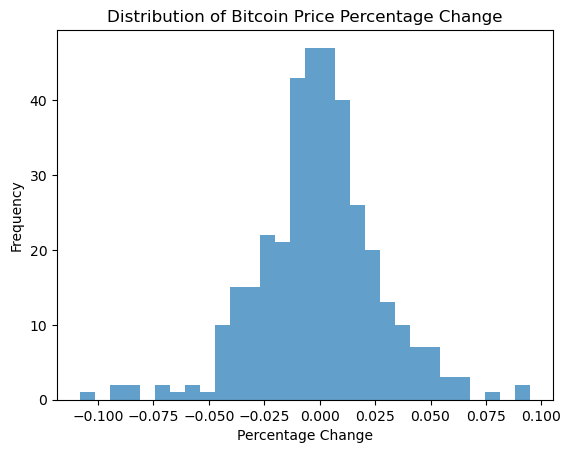

In [38]:
#Histogram

Pt4 = BTC['PerChange'].plot(kind='hist', bins=30, alpha=0.7) 
Pt4.set_title("Distribution of Bitcoin Price Percentage Change")
Pt4.set_xlabel("Percentage Change")
Pt4.set_ylabel("Frequency")
plt.show()


In [ ]:
#On the above graph, we can find a normal distribution for percentage change. 

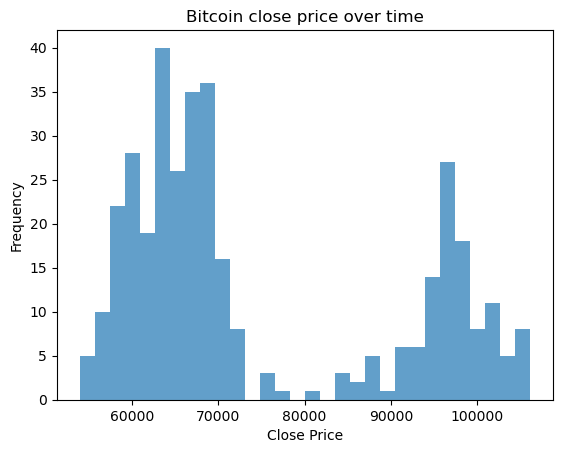

In [40]:
#Histogram 

Pt5 = BTC['close'].plot(kind='hist', bins=30, alpha=0.7)
Pt5.set_title("Bitcoin close price over time")
Pt5.set_xlabel("Close Price")
Pt5.set_ylabel("Frequency")
plt.show()

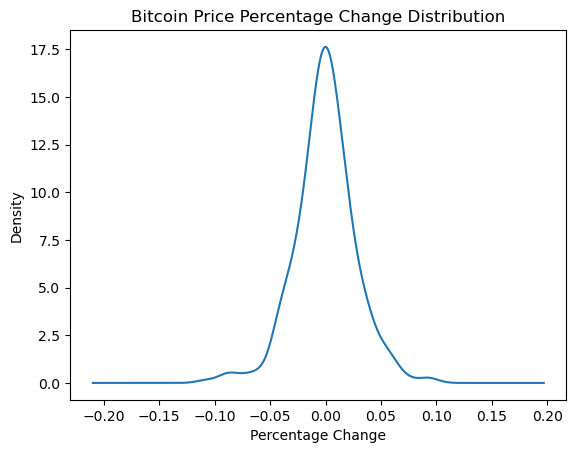

In [41]:
#Now we use Kernal Density graph, which is a smoothing form of histogram. Better way for distribution of data

Pt6 = BTC['PerChange'].plot(kind='kde')
Pt6.set_title("Bitcoin Price Percentage Change Distribution")
Pt6.set_xlabel("Percentage Change")
plt.show()


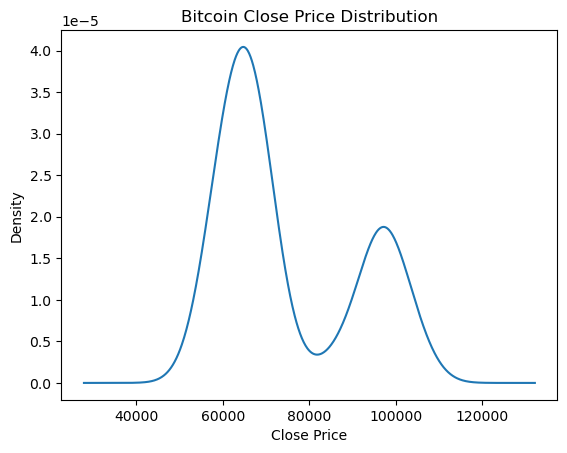

In [44]:
#Kernal Density graph for close price

Pt7 = BTC['close'].plot(kind = 'kde')
Pt7.set_title("Bitcoin Close Price Distribution")
Pt7.set_xlabel("Close Price")
plt.show()

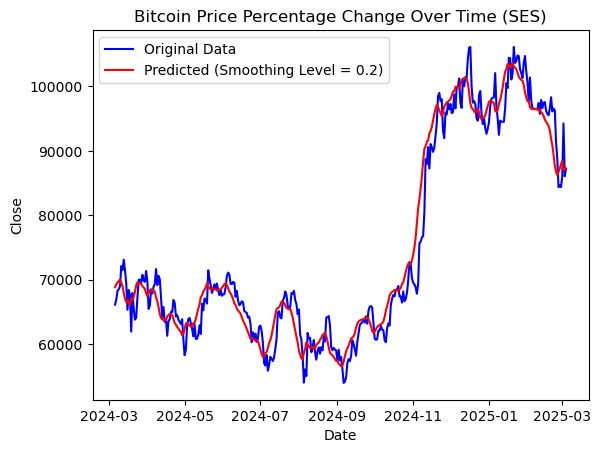

In [48]:
#Now we use simple smoothing method with the help of statsmodel librabry which is used for Time Series Analysis

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing (BTC['close']).fit(smoothing_level=0.2, optimized = False)


plt.plot(BTC['Date'], BTC['close'], label='Original Data', color='Blue')
plt.plot(BTC['Date'], model.fittedvalues, label='Predicted (Smoothing Level = 0.2)', color='red')

plt.title("Bitcoin Price Percentage Change Over Time (SES)")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()
plt.show()


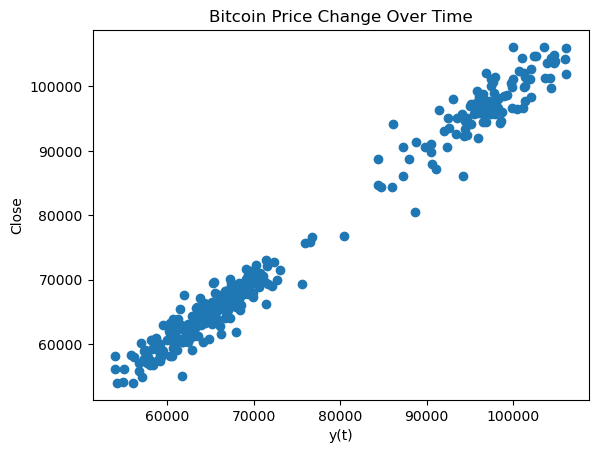

In [50]:
#We use lag plot to check if the series is random

from pandas.plotting import lag_plot

lag_plot(BTC['close'])
plt.title("Bitcoin Price Change Over Time")
plt.ylabel("Close")
plt.show()


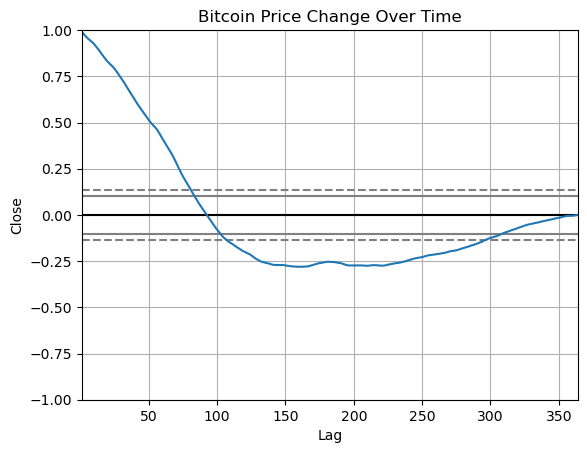

In [51]:
#Autocorrelation plot

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(BTC['close'])
plt.title("Bitcoin Price Change Over Time")
plt.ylabel("Close")
plt.show()